In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    youtube_df = youtube_df.append(df[1:], ignore_index=True)

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)

# false_positive = X_test[(y_test == 1) & (y_pred_class == 0)]
# false_negative = X_test[(y_test == 0) & (y_pred_class == 1)]
# print(false_positive)

spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]
print(tokens.sort_values('spam', ascending=False))

    

General Accuracy: 0.912065439673
[[205  33]
 [ 10 241]]
          spam                              token
2372  0.567065                                out
747   0.564409                              check
2214  0.517928                                 my
3593  0.499336                                you
415   0.496680                                and
3222  0.488712                                 to
3196  0.442231                               this
3172  0.424967                                the
2337  0.350598                                 on
809   0.310757                                com
1779  0.264276                                 it
2479  0.260292                             please
3600  0.243028                            youtube
3052  0.228420                          subscribe
3377  0.223108                              video
637   0.219124                                 br
2314  0.217795                                 of
1366  0.215139                              

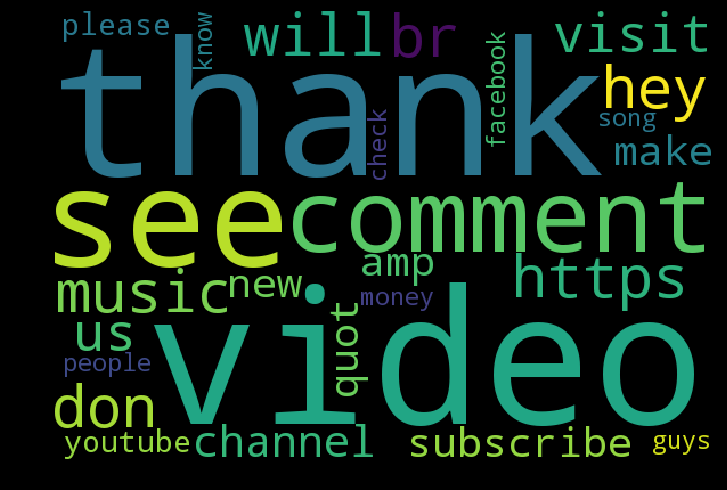

In [3]:
spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]

spam_words = tokens.sort_values('spam', ascending=False)
spam_words = list(spam_words.token)[:70]
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [18]:
filename_list = ['eminem.csv', 'katyperry.csv', 'lmfao.csv', 'psy.csv', 'shakira.csv']
youtube_df = pd.DataFrame(columns=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
for name in filename_list:
    df = pd.read_csv(name, header=None, sep=',', names=['COMMENT_ID','AUTHOR','DATE','CONTENT','CLASS'])
    df['CONTENT'] = df['CONTENT'].str.replace(r'\d+', '')
#     df['CONTENT'] = df['CONTENT'].str.replace(r'\W*\b\w{1,2}\b', '')
    df['CONTENT'] = df['CONTENT'].apply(lambda x: x.split())
    df['CONTENT'] = df['CONTENT'].apply(lambda x: ','.join(x))        
    youtube_df = youtube_df.append(df[1:], ignore_index=True)

# youtube_df['length'] = youtube_df['CONTENT'].apply(len)
# mpl.rcParams['patch.force_edgecolor'] = True
# plt.style.use('seaborn-bright')
# youtube_df.hist(column='length', by='CLASS', bins=50,figsize=(11,5))
# plt.show()

X = youtube_df.CONTENT[1:] # not including the headers..
y = youtube_df.CLASS[1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
stopword = stopwords.words('english')
# The list of stop words is: {a, an, are, as, at, be, by, for, from, had, 
#                             has, have, he, how, i, in, is, it, of, on, or, she, that, 
#                             the, they, this, to, too, was, we, were, what, when, where, who, whose, will, with, you}
stopword.append('You')
stopword.append('I')
vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=True, stop_words=stopword, ngram_range=(1,2))
X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
false_negative_rate = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
print('False Positive Rate:', false_positive_rate*100)
print('False Negative Rate:', false_negative_rate*100)

spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]
# print(tokens.sort_values('spam', ascending=False))

false_positive = X_test[(y_test == '1') & (y_pred_class == '0')]
false_negative = X_test[(y_test == '0') & (y_pred_class == '1')]
# print(false_positive)



General Accuracy: 0.907975460123
[[201  37]
 [  8 243]]
False Positive Rate: 3.18725099602
False Negative Rate: 15.5462184874


In [ ]:
# Text Expansion Method: 
    # Text Normalization
    # Concept Generation
    # Word Sense Disambiguation 
